<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#description" data-toc-modified-id="description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>description</a></span></li><li><span><a href="#Import" data-toc-modified-id="Import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import</a></span><ul class="toc-item"><li><span><a href="#external-library" data-toc-modified-id="external-library-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>external library</a></span></li><li><span><a href="#my-function" data-toc-modified-id="my-function-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>my function</a></span></li></ul></li><li><span><a href="#input-for-the-code" data-toc-modified-id="input-for-the-code-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>input for the code</a></span><ul class="toc-item"><li><span><a href="#load-the-microstructure" data-toc-modified-id="load-the-microstructure-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>load the microstructure</a></span></li></ul></li><li><span><a href="#run-the-code" data-toc-modified-id="run-the-code-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>run the code</a></span></li><li><span><a href="#save-results" data-toc-modified-id="save-results-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>save results</a></span></li><li><span><a href="#load-the-results" data-toc-modified-id="load-the-results-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>load the results</a></span></li></ul></div>

# Phase-field model for growth and coarsening of Si precipitate in AlSi10Mg SLM in a super-saturated matrix
This model is based on the Kim-Kim-Suzuki model [1]
References:


[1] Kim, Kim, and Suzuki. "Phase-field model for binary alloys." Physical Review E 60:6;7186-7197 (1999).


# Import

## external library

In [2]:
import os
import collections
from os import chdir
from scipy.interpolate import UnivariateSpline #pour ma spline
import sys
import random
import importlib
from scipy.interpolate import splev, splrep
from itertools import cycle
import free_nrj_mob
importlib.reload(free_nrj_mob)
import pyvista as pv
import matplotlib.pyplot as plt
import numpy as np
import importlib
import free_nrj_mob
importlib.reload(free_nrj_mob)
from free_nrj_mob import *

In [3]:
Save_path =os.path.join(os.getcwd()) 
dout=dict(np.load(os.path.join(Save_path,"map1727.75s_400_739.09K.npz")))  #
dout.keys()


dict_keys(['ttime', 'time_out', 'T_out', 'X_al_mean_out', 'X_th_mean_out', 'eta_mean_out', 'surf_out', 'X', 'X_al', 'X_th', 'eta'])

In [4]:
"""
t = dout["t_mean"]
T = dout["T_mean"]
eta = dout["eta_mean"]
X_al = dout["X_al_mean"]
surf = dout["surf_mean"]
"""

'\nt = dout["t_mean"]\nT = dout["T_mean"]\neta = dout["eta_mean"]\nX_al = dout["X_al_mean"]\nsurf = dout["surf_mean"]\n'

In [5]:
T = dout["T_out"]
t = dout["time_out"]
eta = dout["eta_mean_out"]
X_al = dout["X_al_mean_out"]
surf = dout["surf_out"]

In [6]:
dout["T_mean"]=dout["T_out"]
dout["eta_mean"]=dout["eta_mean_out"]
dout["t_mean"]=dout["time_out"]

In [7]:
index=np.where(T>=470)
index

(array([ 8513,  8514,  8515, ..., 69997, 69998, 69999], dtype=int64),)

In [8]:
index=0
N=90 # fitting parameter 
m=1
T=T[index:-1][0:-m:N]
t=t[index:-1][0:-m:N]
eta=eta[index:-1][0:-m:N]
X_al =X_al[index:-1][0:-m:N]
surf=surf[index:-1][0:-m:N]
dout["T_mean"]=dout["T_mean"][index:-1][0:-m:N]
dout["eta_mean"]=dout["eta_mean"][index:-m][0:-1:N]
dout["t_mean"]=dout["t_mean"][index:-1][:-m:N]

In [9]:
len(t),len(T),len(X_al),len(eta)

(778, 778, 778, 778)

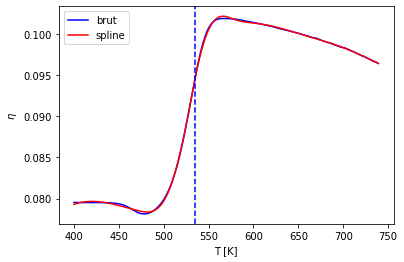

In [10]:
eta_s=UnivariateSpline(x=t, 
                       y=eta, 
                       w=None, bbox=[None, None], k=3, s=5.6e-6, 
                       ext=0, check_finite=False)

#eta_0=eta_s(dout["t_mean"])[0]
#eta_s(dout["t_mean"])[eta_s(dout["t_mean"])<eta_0]=eta_0
plt.plot(dout["T_mean"],dout["eta_mean"],color="b",label="brut")
plt.plot(dout["T_mean"],eta_s(dout["t_mean"]),color="r",label="spline")
plt.axvline(x = 535, color = 'b',linestyle='dashed')

plt.xlabel("T [K]")
plt.ylabel(r"$\eta$")
plt.legend()

In [11]:
n=len(X_al[X_al>=0.025])
X_al[X_al>=0.025] = 0.025+ np.arange(1,0.001,-1/(n))*1e-4 # for a smooth fitting

In [12]:
t_X_al_mod = t
X_al_mod=X_al

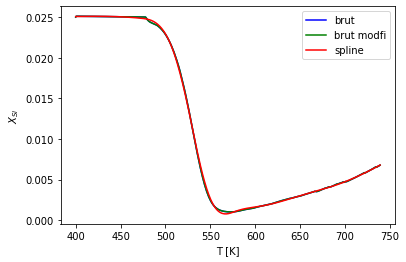

In [13]:
X_al_s=UnivariateSpline(x=t_X_al_mod, 
                       y=X_al_mod, 
                       w=None, bbox=[None, None], k=3, s=5.8e-6, 
                       ext=0, check_finite=False)

plt.plot(t*(1/3)+400,X_al,color="b",label="brut")
 
plt.plot(t_X_al_mod*(1/3)+400,X_al_mod,color="g",label="brut modfi")
plt.plot(dout["T_mean"],X_al_s(t),color="r",label="spline")

plt.xlabel("T [K]")
plt.ylabel(r"$X_{Si}$")
 
plt.legend()

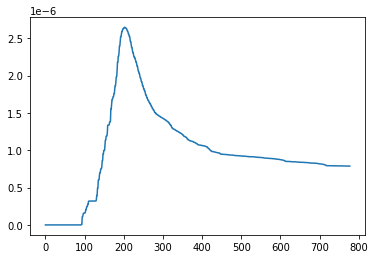

In [14]:
plt.plot(surf)

In [15]:
t_surf_mod = t[t>0]
surf_mod=surf[t>0]

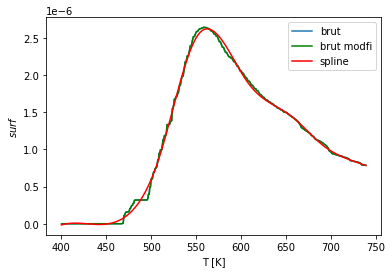

In [16]:
surf_mod2 =  surf_mod# np.hstack(( 0.4e-6,0.5e-6, surf_mod))
t_surf_mod2 =t_surf_mod #np.hstack(( 0,75, t_surf_mod))

surf_s=UnivariateSpline(x=t_surf_mod2 , 
                        y=surf_mod2 , 
                        w=None, bbox=[None, None], k=3, s=5.8e-13,  # s: fitting parameter 
                        ext=0, check_finite=False)




dsurf_dt_s  = surf_s.derivative(n=1)(t)

plt.plot(t*(1/3)+400, surf ,label="brut")
plt.plot(t_surf_mod2*(1/3)+400, surf_mod2,color="g",label="brut modfi")

#plt.plot(t,surf)
plt.plot(T,surf_s(t),color="r",label="spline")

plt.xlabel("T [K]")
plt.ylabel(r"$surf$")

plt.legend()

In [17]:
deta_dt_s  = eta_s.derivative(n=1)(t)
dX_al_dt_s = X_al_s.derivative(n=1)(t)


cp_fcc = np.zeros(len(T))
cp_dia = np.zeros(len(T))
Hm_dia = np.zeros(len(T))
Hm_fcc = np.zeros(len(T))
Vm_dia = np.zeros(len(T))
Vm_fcc = np.zeros(len(T))
d_Hm_fcc_dSi = np.zeros(len(T))

for i in range(len(T)):
    cp_fcc[i] = gibbs_energy(T=T[i], X_Si=X_al_s(t[i]), output ="cp_fcc" )
    Hm_fcc[i] = gibbs_energy(T=T[i], X_Si=X_al_s(t[i]), output ="Hm_fcc" )
    cp_dia[i] = gibbs_energy(T=T[i], X_Si=0.9999, output ="cp_dia" )
    Hm_dia[i] = gibbs_energy(T=T[i], X_Si=0.9999, output ="Hm_dia" )
    Vm_dia[i] = molar_volume(T0=298, T=T[i],X_Si=0.9999, output ="Vmdia" )
    Vm_fcc[i] = molar_volume(T0=298, T=T[i],X_Si=X_al_s(t[i]), output ="Vmfcc" )
    d_Hm_fcc_dSi[i] = gibbs_energy(T=T[i], X_Si=X_al_s(t[i]), output ="d_Hm_fcc_dSi" )

In [18]:
T_dot = 20/60   # K.s-1
umAl = 26.98154 # g.mol-1
umSi = 28.0855  # g.mol-1
gam_H =0.5 # J.m-1


# 

V_sim = (710e-9)**2 /4  # m2  
rho_alloy = eta_s(t)*umSi/Vm_dia + (1-eta_s(t))*umAl/Vm_fcc # g.m-3

In [19]:

dsc_bkg = T_dot*(eta_s(t)*cp_dia*(1/umSi)+(1-eta_s(t))*cp_fcc*(1/umAl))


dsc_surf = gam_H*dsurf_dt_s/(V_sim*rho_alloy)  # 

dsc_preci = (1-eta_s(t))*d_Hm_fcc_dSi*(1/umAl)*dX_al_dt_s+\
             deta_dt_s*(Hm_dia*(1/umSi))+(-deta_dt_s)*(Hm_fcc*(1/umAl))

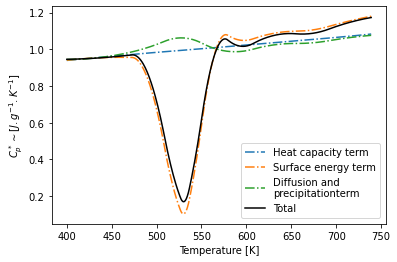

In [20]:
plt.plot(T,dsc_bkg*3,label='Heat capacity term',linestyle='dashdot')
plt.plot(T,(dsc_bkg+dsc_preci)*3,label='Surface energy term',linestyle='dashdot')

plt.plot(T,(dsc_bkg+dsc_surf)*3,label='Diffusion and '+'\n'+ 'precipitationterm',linestyle='dashdot')

plt.plot(T,(dsc_bkg+dsc_surf+dsc_preci)*3, color='black', label='Total')
plt.xlabel('Temperature [K]')
plt.ylabel(r'$C_p^* \sim[J.g^{-1}.K^{-1}]$')
plt.legend(loc='center left', bbox_to_anchor=(0.55, 0.2)) 
#plt.xlim([350,800])

In [21]:
exp_data=np.loadtxt(open("heat capacity_data.csv", "rb"), delimiter=",", skiprows=1)
#exp_data_Yang=np.loadtxt(open("heat capacity_data_Yang.csv", "rb"), delimiter=".", skiprows=1)
exp_data_Yang=np.loadtxt('Yang.txt')

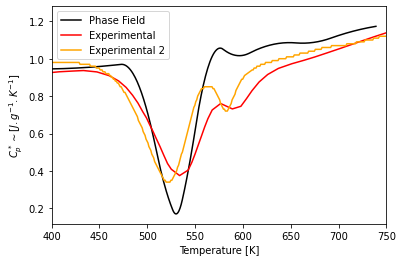

In [22]:
plt.plot(T,(dsc_bkg+dsc_surf+dsc_preci)*3, color='black', label='Phase Field')
plt.plot(exp_data[:,0],exp_data[:,1]/1000, color='red', label='Experimental')
plt.plot(exp_data_Yang[:,0]+273.15,exp_data_Yang[:,1], color='orange', label='Experimental 2')
plt.xlabel('Temperature [K]')
#plt.axvline(x = 535, color = 'b',linestyle='dashed')
#plt.axvline(x = 590, color = 'b',linestyle='dashed')
plt.xlim(400,750)
plt.ylabel(r'$C_p^* \sim[J.g^{-1}.K^{-1}]$')
plt.legend()

#### Ref ------------------------------------------------

In [23]:
"""
plt.plot(T,dsc_bkg*3)
plt.plot(T,(dsc_bkg+dsc_preci)*3)

plt.plot(T,(dsc_bkg+dsc_surf)*3)

plt.plot(T,(dsc_bkg+dsc_surf+dsc_preci)*3,color='black')

#plt.xlim([350,800])
"""

"\nplt.plot(T,dsc_bkg*3)\nplt.plot(T,(dsc_bkg+dsc_preci)*3)\n\nplt.plot(T,(dsc_bkg+dsc_surf)*3)\n\nplt.plot(T,(dsc_bkg+dsc_surf+dsc_preci)*3,color='black')\n\n#plt.xlim([350,800])\n"